In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
pd.set_option('display.max_columns',None)

In [2]:
dataset = pd.read_csv(r'C:\Users\HP\Desktop\Python\Vs Python\Projects\Lung_cancer\Dataset\dataset_med.csv')

In [3]:
dataset.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [4]:
dataset.shape

(890000, 17)

In [5]:
dataset.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [7]:
dataset.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014128,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df = dataset.drop('id',axis=1)

In [9]:
df['diagnosis_date']=pd.to_datetime(df['diagnosis_date'])

In [10]:
df['end_treatment_date']=pd.to_datetime(df['end_treatment_date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   age                 890000 non-null  float64       
 1   gender              890000 non-null  object        
 2   country             890000 non-null  object        
 3   diagnosis_date      890000 non-null  datetime64[ns]
 4   cancer_stage        890000 non-null  object        
 5   family_history      890000 non-null  object        
 6   smoking_status      890000 non-null  object        
 7   bmi                 890000 non-null  float64       
 8   cholesterol_level   890000 non-null  int64         
 9   hypertension        890000 non-null  int64         
 10  asthma              890000 non-null  int64         
 11  cirrhosis           890000 non-null  int64         
 12  other_cancer        890000 non-null  int64         
 13  treatment_type      890000 no

In [12]:
df['treatment_duration_days'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days

In [13]:
df=df.drop(columns=['end_treatment_date','diagnosis_date'])

In [14]:
numerical_feature = df.select_dtypes(include=['int','float']).columns.tolist()
category_feature = df.select_dtypes(include='object').columns.tolist()

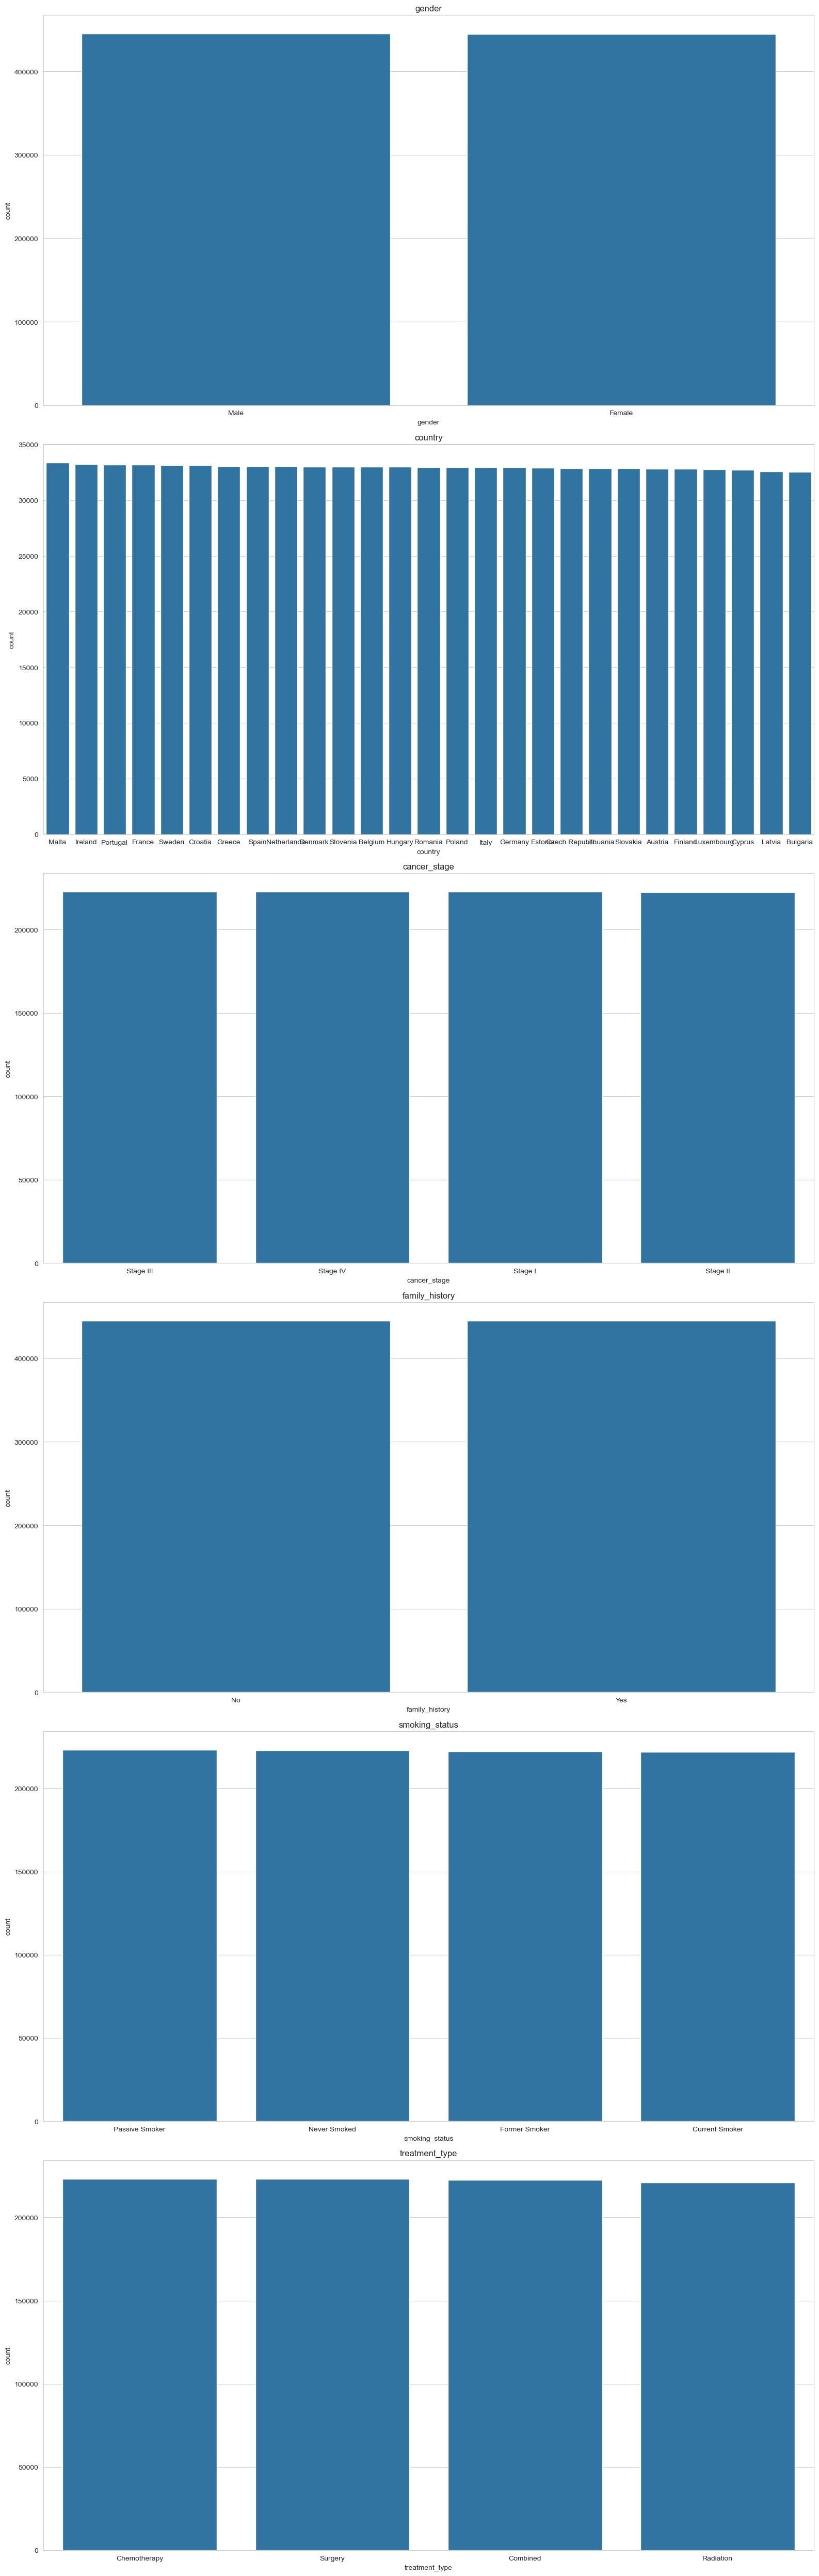

In [15]:
rows = 6
cols = 1

fig, ax = plt.subplots(rows, cols, figsize=(16, 50))
ax = ax.flatten()

for i, cat in enumerate(category_feature):
    order = df[cat].value_counts().index
    sns.countplot(data=df, x=cat, ax=ax[i], order=order)
    ax[i].set_title(f'{cat}')  


for j in range(len(category_feature), len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()

In [16]:
numerical_2_feature = ['hypertension', 'asthma','cirrhosis', 'other_cancer','survived']

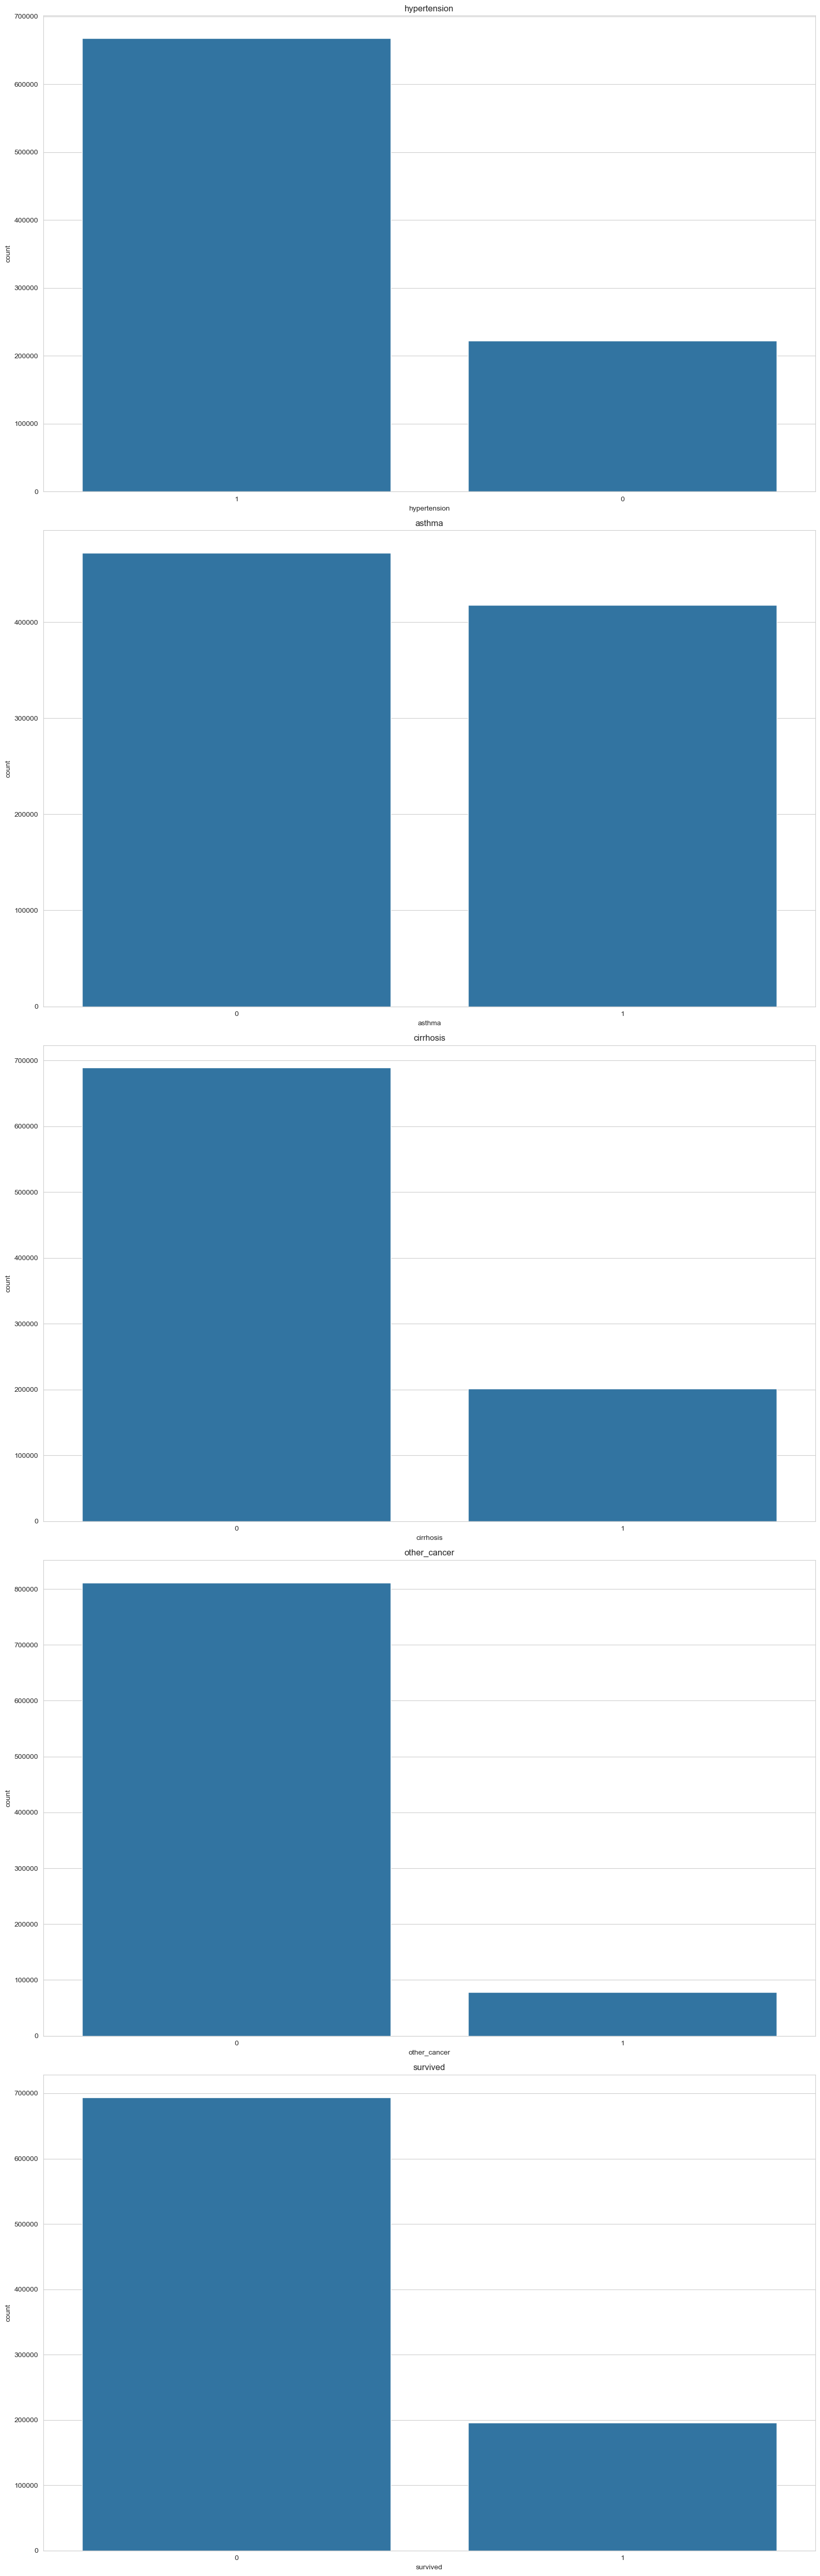

In [17]:
rows = 5
cols = 1

fig, ax = plt.subplots(rows, cols, figsize=(16, 50))
ax = ax.flatten()

for i, num in enumerate(numerical_2_feature):
    order = df[num].value_counts().index
    sns.countplot(data=df, x=num, ax=ax[i], order=order)
    ax[i].set_title(f'{num}')  


for j in range(len(numerical_2_feature), len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()

In [19]:
def age_category(age):
    if age <= 30:
        return 'Young'
    elif 31 >= age <= 60:
        return 'Middle age'
    else:
        return 'Old'
    
df['age_group'] = df['age'].apply(age_category)

In [20]:
survival_rate_age_group = df.groupby('age_group')['survived'].mean().sort_values(ascending=False )
survival_rate_age_group

age_group
Young         0.225590
Middle age    0.223124
Old           0.220185
Name: survived, dtype: float64

In [21]:
df.head()

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration_days,age_group
0,64.0,Male,Sweden,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,0,523,Old
1,50.0,Female,Netherlands,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,1,424,Old
2,65.0,Female,Hungary,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,0,370,Old
3,51.0,Female,Belgium,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,0,443,Old
4,37.0,Male,Luxembourg,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,0,406,Old


In [24]:
df.groupby('survived')['bmi'].mean()

survived
0    30.494141
1    30.494278
Name: bmi, dtype: float64

In [26]:
df.groupby('cancer_stage')['survived'].mean()

cancer_stage
Stage I      0.218133
Stage II     0.220891
Stage III    0.220527
Stage IV     0.221366
Name: survived, dtype: float64

In [27]:
df.groupby('smoking_status')['survived'].mean()

smoking_status
Current Smoker    0.220340
Former Smoker     0.219641
Never Smoked      0.220910
Passive Smoker    0.220025
Name: survived, dtype: float64

In [28]:
df.groupby('hypertension')['survived'].mean()

hypertension
0    0.220187
1    0.220243
Name: survived, dtype: float64

In [29]:
df.groupby('asthma')['survived'].mean()

asthma
0    0.220935
1    0.219433
Name: survived, dtype: float64

In [30]:
df.groupby('cirrhosis')['survived'].mean()

cirrhosis
0    0.219791
1    0.221729
Name: survived, dtype: float64

In [31]:
df.groupby('treatment_type')['survived'].mean()

treatment_type
Chemotherapy    0.218739
Combined        0.220126
Radiation       0.220557
Surgery         0.221499
Name: survived, dtype: float64

In [32]:
df.groupby('gender')['survived'].mean()

gender
Female    0.219913
Male      0.220545
Name: survived, dtype: float64